In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Label Encoding
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
# remove useless column
data = data.drop(['CustomerID'],axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

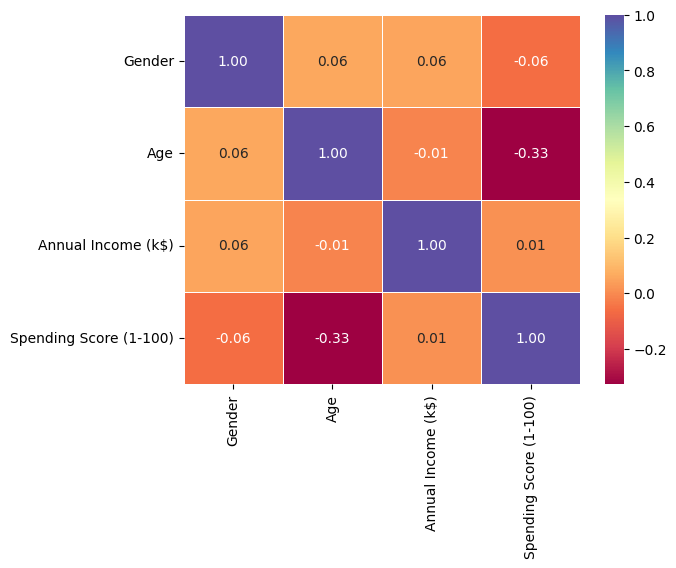

In [8]:
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor="white",cmap=sns.color_palette("Spectral", as_cmap=True),fmt=".2f")

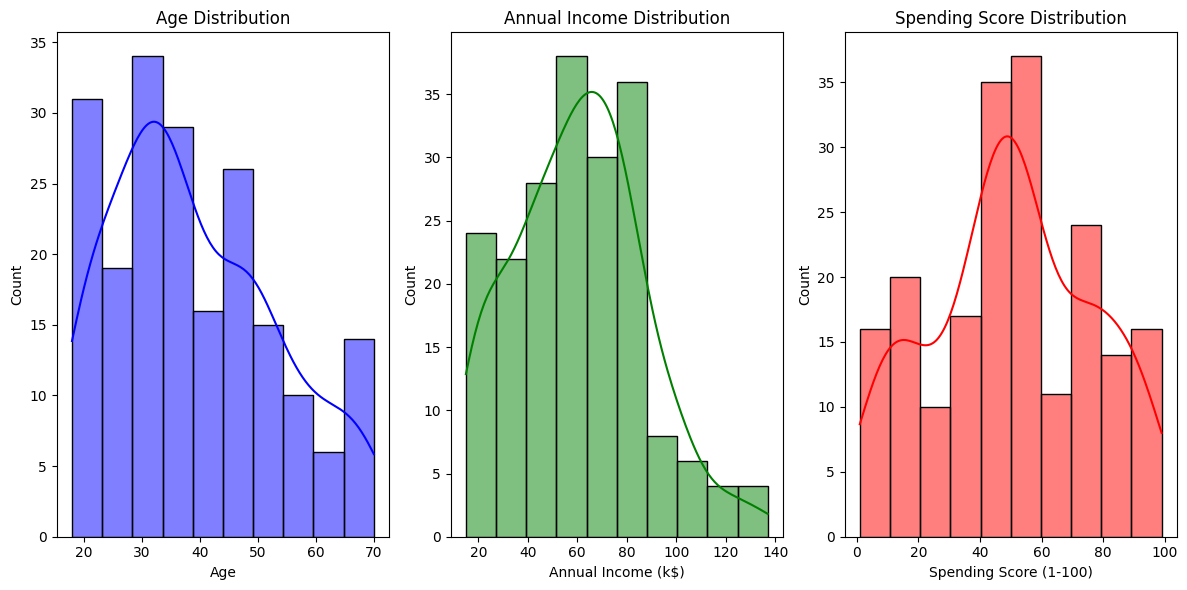

In [9]:
# create histograms to see the distribution of each variable
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=10, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=10, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=10, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


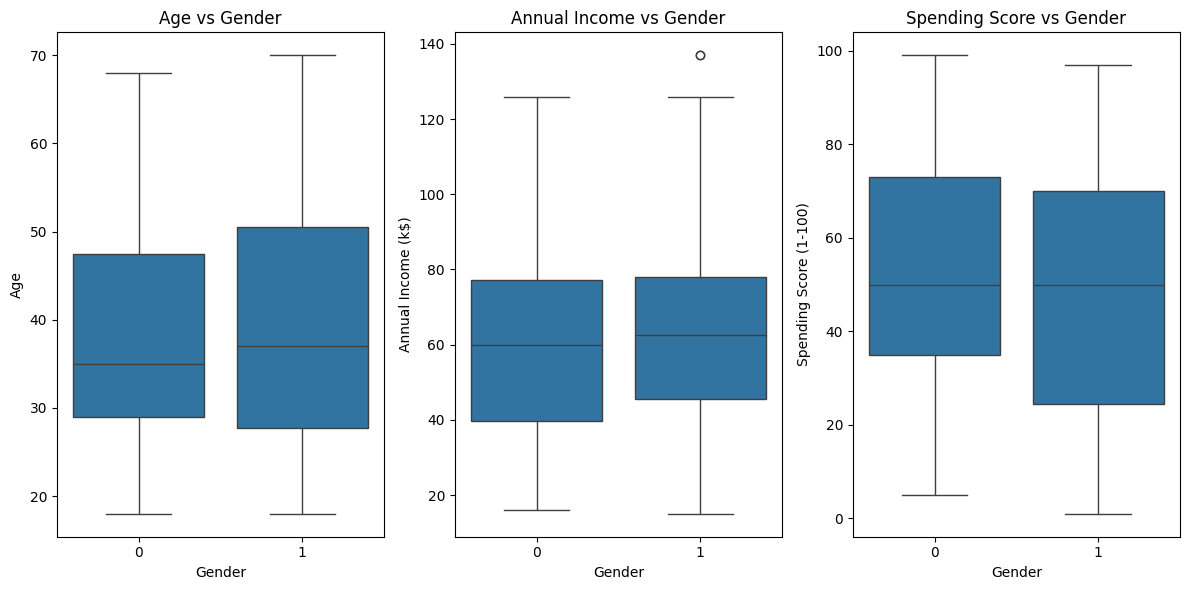

In [10]:
# create boxplots to examine outliers and distributions of variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=data)
plt.title('Age vs Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Annual Income vs Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Spending Score vs Gender')

plt.tight_layout()
plt.show()


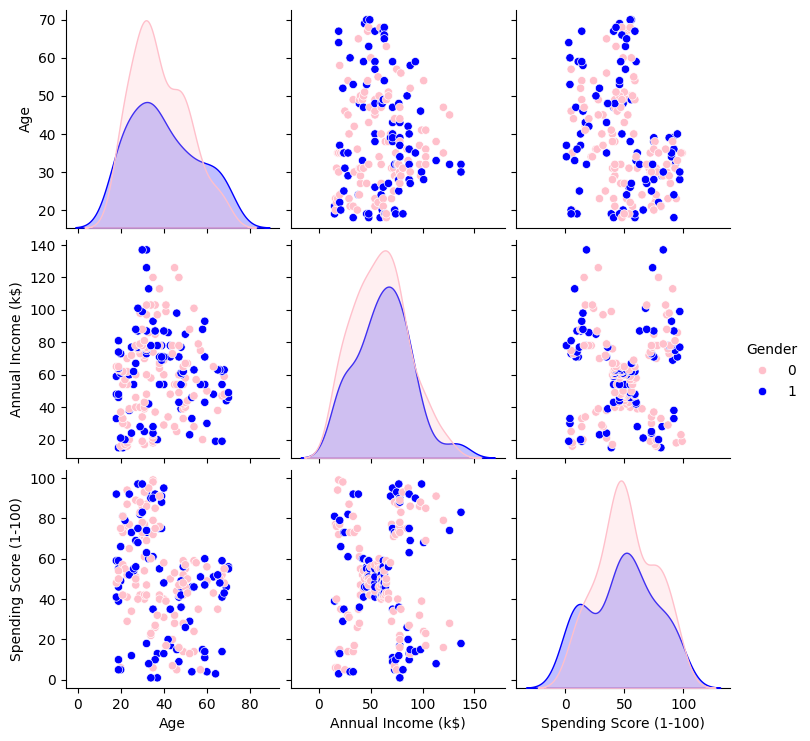

In [11]:
sns.pairplot(data, hue='Gender',palette={1: 'blue', 0: 'pink'})
plt.show()

**Finding the Optimal K Value with the Elbow Method**

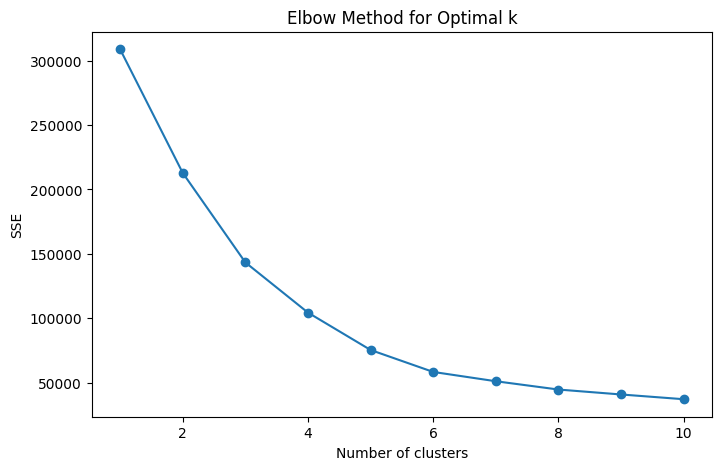

In [12]:
from sklearn.cluster import KMeans

# Sum of squares error (SSE) for the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Elbow chart
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

**K-Means**

In [13]:
# Create K-Means model based on optimal k value
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Average values ​​of each segment
print(data.groupby('Cluster').mean())


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.378947  44.894737           48.705263               42.631579
1        0.461538  32.692308           86.538462               82.128205
2        0.500000  24.821429           28.714286               74.250000
3        0.526316  40.394737           87.000000               18.631579


In [14]:
from sklearn.metrics import silhouette_score

# get cluster labels
labels = kmeans.labels_

# calculate Silhouette score
silhouette_avg = silhouette_score(data, labels)
print(f'Silhouette Skoru: {silhouette_avg:.2f}')


Silhouette Skoru: 0.41


**Hierarchical Clustering**

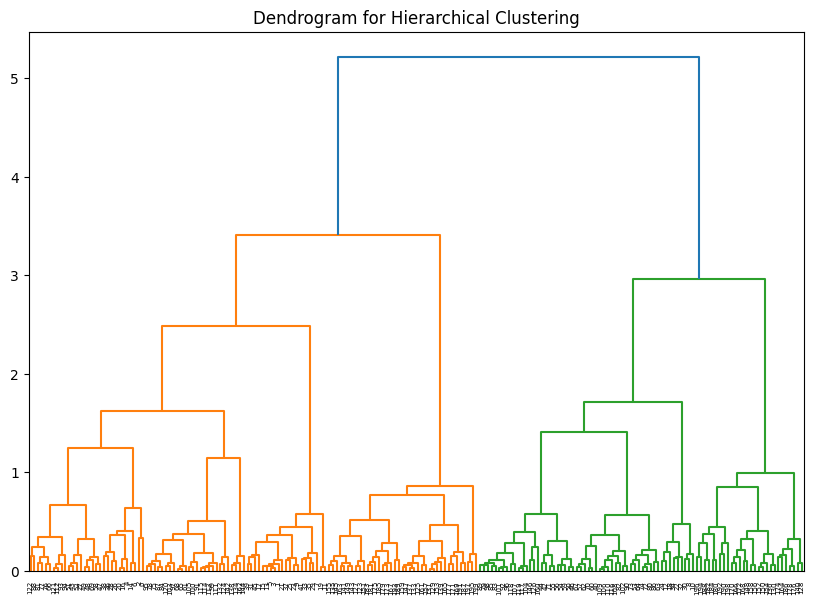

In [15]:
# determining the number of clusters with dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

# data normalization (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# hierarchical clustering with ward method
linked = linkage(data_scaled, method='ward')

# create Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()





In [16]:
# building a model with hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# determined number of clusters
n_clusters = 3

# model
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
data['Cluster_HC'] = hc.fit_predict(data_scaled)

# cluster results
print(data.groupby('Cluster_HC').mean())


              Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster_HC                                                                    
0           0.488095  51.988095           63.714286               33.440476   
1           0.376623  27.636364           43.961039               52.311688   
2           0.461538  32.692308           86.538462               82.128205   

             Cluster  
Cluster_HC            
0           1.107143  
1           1.000000  
2           1.000000  


**DBSCAN**

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(data_scaled)

print(data.groupby('Cluster_DBSCAN').mean())


                Gender    Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster_DBSCAN                                                              
0                 0.44  38.85               60.56                    50.2   

                Cluster  Cluster_HC  
Cluster_DBSCAN                       
0                 1.045       0.775  


In [38]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.5, min_samples=5).fit(data_scaled)
labels=db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0
